<a href="https://colab.research.google.com/github/jjayli/my-data-science/blob/main/notebooks/Python_Data_Science_Handbook_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jake VanderPlas의
**"Python Data Science Handbook"**

# 1. 챕터 구성

이 책은 크게 5개의 파트로 나뉘어 있으며, 데이터 과학의 필수 도구를 순서대로 다룹니다.

 - IPython: 파이썬을 대화형으로 효율적으로 쓰기 위한 셸과 주피터 노트북 사용법.

 - NumPy: 고성능 수치 계산을 위한 배열(Array) 처리 기초.

 - Pandas: 표(Table) 형태의 데이터를 다루고 정제하는 기술.

 - Matplotlib: 데이터를 그래프로 그리는 시각화 기술.

 - Machine Learning: Scikit-Learn 라이브러리를 활용한 머신러닝 알고리즘 및 적용.



#2. 주요 챕터 및 요약

**챕터 3** - Data Manipulation with Pandas
모든 데이터 분석과 AI 모델링의 시작은 '데이터 전처리'라고 생각하며 데이터 핸들링을 보다 잘 하기 위해 필요한 챕터입니다.

  * DataFrame과 Series 객체의 이해.
  * 결측치(비어있는 값) 처리 및 데이터 정제 방법.
  * GroupBy, Pivot Table을 활용한 데이터 집계 및 통계 분석.
  * 여러 데이터를 합치는 Merge와 Concat 기법.


**챕터 4** - Visualization with Matplotlib
: 데이터를 숫자로만 보면 패턴을 놓치기 쉽습니다. 시각화는 데이터의 인사이트를 발견하고, 결과를 빠르게 이해하기 좋은 수단.

  * 기본적인 라인 플롯, 산점도, 히스토그램 그리기.
  * Legend, Colorbar, Subplots 설정법.
  * Seaborn 라이브러리와의 연동을 통한 통계적 시각화.

**챕터 5** - Machine Learning
머신러닝 기초 코드와 데이터를 어떻게 검증하고 튜닝하는지 잘 써져있습니다.


* Scikit-Learn API의 일관된 사용법
* Model Validation: 교차 검증과 그리드 서치.
* Feature Engineering: 텍스트나 범주형 데이터를 숫자로 변환하는 법.
* 주요 알고리즘: 나이브 베이즈, 선형 회귀, SVM, 랜덤 포레스트, PCA 등.

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# -------------------------------------------------------
# 1. NumPy: 고성능 배열 연산의 기초
# -------------------------------------------------------
print("=== 1. NumPy 실습 ===")

# 난수 배열 생성 (5x3 행렬)
data = np.random.randint(0, 10, (5, 3))
print(f"원본 배열:\n{data}")

# 브로드캐스팅: 모든 원소에 10 더하기 (반복문 없이 처리됨)
print(f"브로드캐스팅 (+10):\n{data + 10}")

# 집계 함수: 각 열(column)의 평균 구하기
print(f"열별 평균: {data.mean(axis=0)}\n")

=== 1. NumPy 실습 ===
원본 배열:
[[0 8 5]
 [5 3 2]
 [7 3 9]
 [1 2 9]
 [9 3 2]]
브로드캐스팅 (+10):
[[10 18 15]
 [15 13 12]
 [17 13 19]
 [11 12 19]
 [19 13 12]]
열별 평균: [4.4 3.8 5.4]



In [6]:
# -------------------------------------------------------
# 2. Pandas: 데이터 분석과 처리
# -------------------------------------------------------
print("=== 2. Pandas 실습 ===")

# 가상의 성적 데이터 생성
df = pd.DataFrame({
    '학생': ['A', 'B', 'C', 'D', 'E'],
    '수학': [90, 80, np.nan, 70, 95],  # 결측치(NaN) 포함
    '영어': [85, 85, 90, 60, 100],
    '반': [1, 1, 2, 2, 1]
})

print("원본 데이터프레임:")
print(df)

# 결측치 처리: 수학 점수가 없는 학생은 평균 점수로 대체
math_mean = df['수학'].mean()
df['수학'] = df['수학'].fillna(math_mean)

# 그룹화(GroupBy): 반별 과목 평균 구하기
class_avg = df.groupby('반')[['수학', '영어']].mean()
print("\n반별 평균 점수:")
print(class_avg)
print("\n")


=== 2. Pandas 실습 ===
원본 데이터프레임:
  학생    수학   영어  반
0  A  90.0   85  1
1  B  80.0   85  1
2  C   NaN   90  2
3  D  70.0   60  2
4  E  95.0  100  1

반별 평균 점수:
          수학    영어
반                 
1  88.333333  90.0
2  76.875000  75.0




--- 1. 데이터 로드 및 구조 확인 (Pandas) ---
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

데이터 크기: (150, 5)

클래스별 데이터 개수:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

--- 2. 데이터 시각화 (Matplotlib & Seaborn) ---


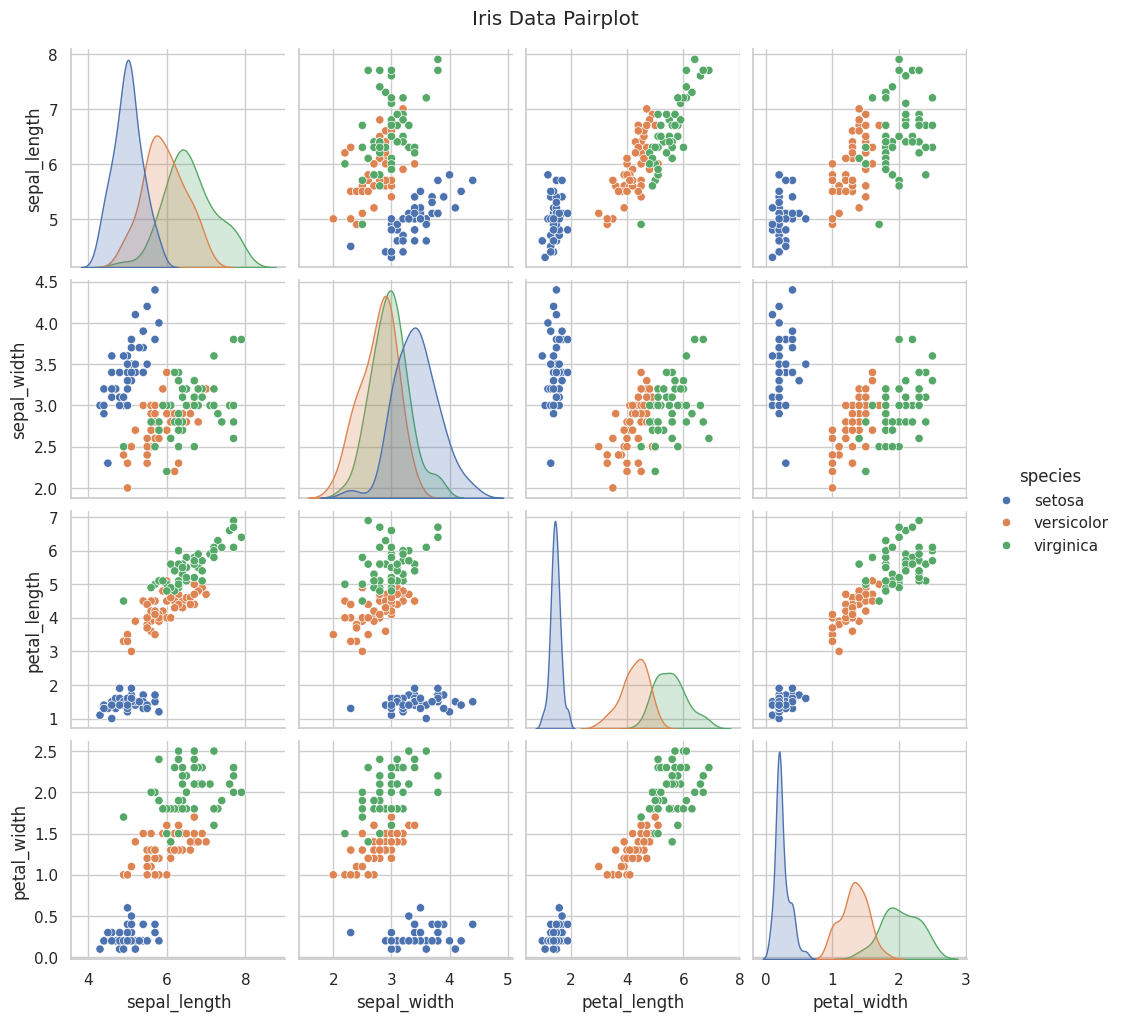


--- 3. 머신러닝 분류 모델 학습 (Scikit-Learn) ---
모델 정확도(Accuracy): 0.97

분류 리포트:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [1]:

# -------------------------------------------------------
# 3. Machine Learning: Scikit-Learn을 이용한 분류
# -------------------------------------------------------

  # 1. [Pandas] 데이터 로드 및 확인
  # Seaborn에 내장된 iris 데이터셋을 불러옵니다.
print("--- 1. 데이터 로드 및 구조 확인 (Pandas) ---")
iris = sns.load_dataset('iris')
print(iris.head()) # 상위 5개 행 출력
print(f"\n데이터 크기: {iris.shape}")
print(f"\n클래스별 데이터 개수:\n{iris['species'].value_counts()}")

  # 2. [Matplotlib & Seaborn] 데이터 시각화 (EDA)
  # 꽃잎과 꽃받침의 관계를 시각적으로 확인합니다.
print("\n--- 2. 데이터 시각화 (Matplotlib & Seaborn) ---")
sns.set(style='whitegrid')
# pairplot: 특성 간의 상관관계를 한눈에 보여주는 그래프
sns.pairplot(iris, hue='species', height=2.5)
plt.suptitle("Iris Data Pairplot", y=1.02) # 제목 추가
plt.show()

  # 3. [Scikit-Learn] 머신러닝 모델 학습 및 평가
print("\n--- 3. 머신러닝 분류 모델 학습 (Scikit-Learn) ---")

# 특성(X)과 타겟(y) 분리
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# 학습용 데이터와 테스트용 데이터 분리 (훈련 75%, 테스트 25%)
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

# 모델 선택: 가우시안 나이브 베이즈 (빠르고 간단한 분류기)
model = GaussianNB()

# 모델 학습 (fit)
model.fit(Xtrain, ytrain)

# 예측 (predict)
y_model = model.predict(Xtest)

# 결과 평가
acc = accuracy_score(ytest, y_model)
print(f"모델 정확도(Accuracy): {acc:.2f}")
print("\n분류 리포트:\n", classification_report(ytest, y_model))